<a href="https://www.kaggle.com/code/rebeccapringle/titanic-competition-code?scriptVersionId=117761561" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#see the trends between all the data values given 

#see that lower classes less likely to survive
train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)
train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

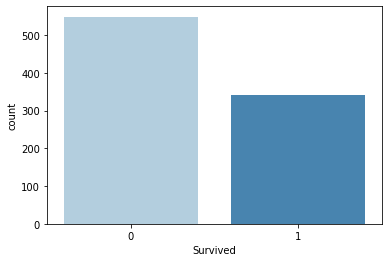

In [5]:
sns.countplot(x = train["Survived"], palette = "Blues")

<AxesSubplot:xlabel='Sex', ylabel='count'>

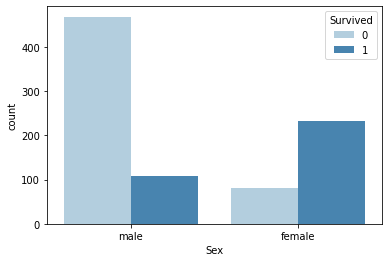

In [6]:
sns.countplot(data = train, x = "Sex", hue="Survived", palette="Blues")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

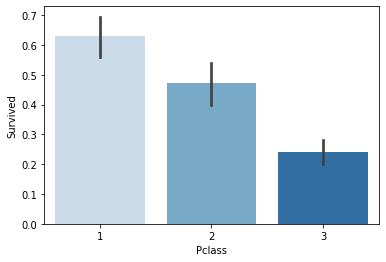

In [7]:
sns.barplot(data = train, x = "Pclass", y = "Survived", palette = "Blues")

In [8]:
#likely bias due to more passengers from the port rather than higher proportion of deaths
train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)
train[['SibSp','Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending = True)
train[['Parch','Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending = True)

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


In [9]:
train['catSex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train['catEmbark'] = train['Embarked'].apply(lambda x: 0 if x =='S' else(1 if x == 'C' else '2'))

In [10]:
test['catSex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['catEmbark'] = test['Embarked'].apply(lambda x: 0 if x =='S' else(1 if x == 'C' else '2'))

In [11]:
train = train.drop([ "Name","Sex", "Embarked", "Ticket", "Cabin"], axis=1)
test = test.drop(["Name", "Sex", "Embarked", "Ticket", "Cabin"], axis=1)

In [12]:
train.dropna(inplace = True)

In [13]:
test['Age'].fillna(test['Age'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

In [14]:
X, y = train.loc[:, train.columns != 'Survived'].values, train['Survived'].values

In [15]:
lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X, y)

LogisticRegression(max_iter=10000)

In [16]:
y_pred = lr_model.predict(test.values)

In [17]:
test['Survived'] = lr_model.predict(test.values)
submission = test[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
